<img src="https://www.virtualeducationexpo.ie/wp-content/uploads/2020/08/CCT_Logo_New_Aug_17.jpg" width="400">

# <center>*Data Preparation and Machine Learning*<center>

## <center>Student: Marilia Meneses da Silva <center>

### <center>*Shill Bidding Dataset*<center>
    
 

## Table of Contents

* 1. [Introduction](#1.-Introduction)

* 2. [Data Understanding](#2.-Data-Understanding)  
    2.1 [Importing Libraries](#2.1-Importing-Libraries)  
    2.2 [Reading](#2.2-Reading)  
    2.3 [Measures of variability](#2.3-Measures-of-Variability)
* 3. [Exploratory Data Analysis](#3.-EDA)  
    3.1 [Missing Values](#3.1-Missing-Values)  
    3.2 [Removal of Outliers](#3.2-Removal-of-Outliers)  
    3.3 [IQR (Interquartile Range)](#3.3-IQR-(Interquartile-Range))  
    3.4 [Distribution of Variables](#3.4-Distribution-of-Variables)  
    3.5 [Distribution of Bidder Tendency and Bidding Ratio](#3.5-Distribution-of-Bidder-Tendency-and-Bidding-Ratio)  
    3.6 [Correlation Among Variables](#3.6-Correlation-Among-Variables)  
    3.7 [ScatterPlots](#3.7-ScatterPlots)  
    3.8 [Distribution of Class](#3.8-Distribution-of-Class)
* 4. [Data Preparation](#4.-Data-Preparation)  
    4.1 [Features Importances](#4.1-Features-Importances)  
    4.2 [Feature Scaling](#4.2-Feature-Scaling)  
    4.3 [Spliting in train and test](#4.3-Spliting-in-train-and-test)  
* 5. [PCA vs LDA](#5.-PCA-vs-LDA)  
    5.1 [PCA](#5.1-PCA)  
    5.2 [LDA](#5.2-LDA)  
* 6. [Class Imbalance](#6.-Class-Imbalance)  
    6.1 [SMOTE technique](#6.1-SMOTE-technique)  
* 7. [Model Building](#7.-Model-Building)  
    7.1 [Modelling on the Original Dataset](#7.1-Modelling-on-the-original-dataset)  
      7.1.1 [Logistic Regression ](#7.1.1-Logistic-Regression)  
      7.1.2 [Decision Tree Classifier](#7.1.2-Decision-Tree-Classifier)  
      7.1.3 [K-nearest Neighbors](#7.1.3-K-nearest-Neighbors)  
    7.2 [Modelling after SMOTE](#7.2-Modelling-after-SMOTE)  
        7.2.1 [Logistic Regression](#7.2.1-Logistic-Regression)  
        7.2.2 [Decision Tree Classifier](#7.2.2-Decision-Tree-Classifier)  
        7.1.3 [K-nearest Neighbors](#7.2.3-K-nearest-Neighbors)
        
* 8. [Comparing Models](#8.-Comparing-Models)  
    8.1[Comparing Predictions vs Real Values](#8.1-Comparing-Predictions-vs-Real-Values)  
* 9. [Conclusion](#9.-Conclusion)
* 10. [Reference List](#10.-Reference-list)

## 1. Introduction 

In this project, I will be working with the dataset Shill biddig available at: https://archive.ics.uci.edu/ml/datasets/Shill+Bidding+Dataset.

Customers throughout the world have the option of bidding on eBay. A 'bid' is the price offered by anyone participating in this procedure. Shill bidding occurs when a seller deliberately inflates the final price of his or her auction by faking bids. In the data set, normal bids are labelled as '0', while abnormal bids are labelled as '1'. 
 
The main goal is to use classification algorithms to predict bids in the future. The difference between regression and classification models is the nature of the dependent variable which can be qualitative, in the case of classification, and continuous in the case of regression. (Stéphane Tufféry, 2011)

For this purpose, I will divide this project into Data Understanding, EDA, Data Preparation, PCA vs LDA, Class Imbalance, Modelling, Comparation between models chosen and Conclusion.   

**Data Dictionary:**

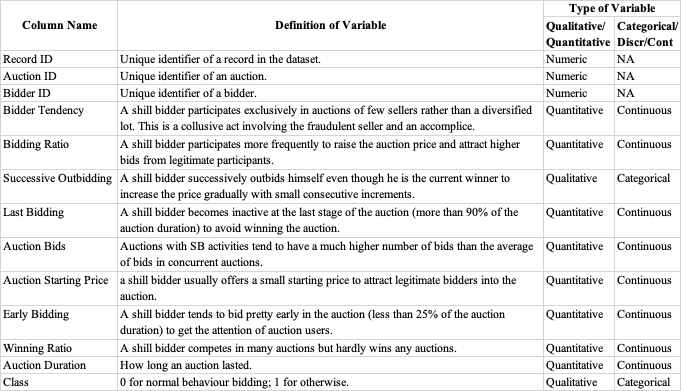


## 2. Data Understanding 

### 2.1 Importing Libraries

The first step of data preparation is to import the libraries necessary in the cell bellow. I imported the libraries for dataframe, visualisation, preprocessing, modelling and measurement.

In [1]:
#Libraries to handle dataframe and to perform statistical analysis
import pandas as pd
import numpy as np

#Visualization
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

#Preprocessing
from sklearn.model_selection import train_test_split

#Scaling
from sklearn.preprocessing import MinMaxScaler

#PCA
from sklearn.decomposition import PCA

#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
#set 4 decimals
np.set_printoptions(precision=4)

#Balancing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Models 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


# Measurement
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

#warnings
import warnings
warnings.filterwarnings(action='ignore')

### 2.2 Reading 

Then I will be uploading the dataset.

In [2]:
df = pd.read_csv("Shill Bidding Dataset.csv",index_col='Record_ID')

Reading the first 5 rows of the data set.

In [3]:
df.head()

,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
Record_ID,,,,,,,,,,,,
1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


And the last 5 rows: 

In [4]:
df.tail()

,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
Record_ID,,,,,,,,,,,,
15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0
15144,2481,a***l,0.016393,0.043478,0.0,0.340351,0.217391,0.993593,0.340351,0.000000,7,0


Checking the size of the data set.

In [5]:
df.shape

(6321, 12)

Using the function .info(), I want to see if we have any missing values and what type of observations we have. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6321 entries, 1 to 15144
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Auction_ID              6321 non-null   int64  
 1   Bidder_ID               6321 non-null   object 
 2   Bidder_Tendency         6321 non-null   float64
 3   Bidding_Ratio           6321 non-null   float64
 4   Successive_Outbidding   6321 non-null   float64
 5   Last_Bidding            6321 non-null   float64
 6   Auction_Bids            6321 non-null   float64
 7   Starting_Price_Average  6321 non-null   float64
 8   Early_Bidding           6321 non-null   float64
 9   Winning_Ratio           6321 non-null   float64
 10  Auction_Duration        6321 non-null   int64  
 11  Class                   6321 non-null   int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 642.0+ KB


In [7]:
    # Displaying how many attributes the dataset has
    print('\033[1m'+'Number of observations: '+'\033[0m', df.shape[0])
    print('\033[1m'+'Number of features: '+'\033[0m', df.shape[1])

Number of observations:  6321
Number of features:  12


Checking the information about the dataset, we can affirm that there are 12 features, which 8 are float type, 3 as integer type and 1 as object type. And a total of 6321 observations.

### 2.3 Measures of Variability

Using the function .describe() to obtain the distribution of variables, including mean, median, min, max, and the different quartiles. Transpose used to provide a better visualisation. (pandas.pydata.org, n.d.)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Auction_ID,6321.0,1241.388230,735.770789,5.000000,589.000000,1246.000000,1867.000000,2538.000000
Bidder_Tendency,6321.0,0.142541,0.197084,0.000000,0.027027,0.062500,0.166667,1.000000
Bidding_Ratio,6321.0,0.127670,0.131530,0.011765,0.043478,0.083333,0.166667,1.000000
Successive_Outbidding,6321.0,0.103781,0.279698,0.000000,0.000000,0.000000,0.000000,1.000000
Last_Bidding,6321.0,0.463119,0.380097,0.000000,0.047928,0.440937,0.860363,0.999900
Auction_Bids,6321.0,0.231606,0.255252,0.000000,0.000000,0.142857,0.454545,0.788235
Starting_Price_Average,6321.0,0.472821,0.489912,0.000000,0.000000,0.000000,0.993593,0.999935
Early_Bidding,6321.0,0.430683,0.380785,0.000000,0.026620,0.360104,0.826761,0.999900
Winning_Ratio,6321.0,0.367731,0.436573,0.000000,0.000000,0.000000,0.851852,1.000000
Auction_Duration,6321.0,4.615093,2.466629,1.000000,3.000000,5.000000,7.000000,10.000000


We can see that the data set consists primarily of numerical data and most of the values range between 0 to 1. This does not happen with the variable 'Auction_Duration', 'Bidding_Ratio' and 'Auction_Bids'. The variable 'Auction_Duration' seem to follow a normal distribution and this will be analysed further ahead. We can also observe how the variable 'Class' is more represented by 0, as well as the variables 'Winning_Ratio' and 'Successive_Outbidding' seem to have plenty of observations clustering around either 0 or 1 values.

Now I want ot include the object variable using the include= object parameter.

In [9]:
df.describe(include=object)

,Bidder_ID
count,6321
unique,1054
top,a***a
freq,112


## 3. EDA

Exploratory Data Analysis is important to visualize and manipulate the data as well as summarize it with its main characteristics, using data visualization methods. It helps us to manipulate the data to take the best decision regards to it and to get answers for what we need.

### 3.1 Missing Values

In [10]:
sum(df.isnull().values.ravel())
df.isna().sum().sum()

0

In [11]:
df.isnull().sum()

Auction_ID                0
Bidder_ID                 0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64

We do not observe any missing values, which means we will not have to handle them.

Using the function <i>.nunique()</i> to see "the number of unique values for each column". (www.w3schools.com, n.d.)

In [12]:
df.nunique()

Auction_ID                 807
Bidder_ID                 1054
Bidder_Tendency            489
Bidding_Ratio              400
Successive_Outbidding        3
Last_Bidding              5807
Auction_Bids                49
Starting_Price_Average      22
Early_Bidding             5690
Winning_Ratio               72
Auction_Duration             5
Class                        2
dtype: int64

Next, I want to extract some statistical information and then get a visual understanding of the data and plot some graphs.

### 3.2 Removal of Outliers

One of the most important step while preparing the data set is to detect and to deal with Outliers. An outlier is any extrem value in the data set that can be an error or not. It can affect the accurancy in the machine learning models. (Pratap Dangeti, 2017, pp.11, 60)

I will plot the boxplots, to visualize the outliers:

In [13]:
def boxp(b,c,col,ax):                                            # Creating function to plot boxplots
    ax=ax[b][c]                                                  # Ax where the graph will be plotted
    sns.boxplot(x=col, data=df, ax=ax, color= "teal")            # Boxplot plot according to column
    ax.set_xlabel('')                                            # Defining x-label
    ax.set_ylabel('')                                            # Defining y-label
    ax.set_title(col, fontweight="bold")                         # Setting title to each plot based on column
    plt.tight_layout()                                           # Organise all the plots

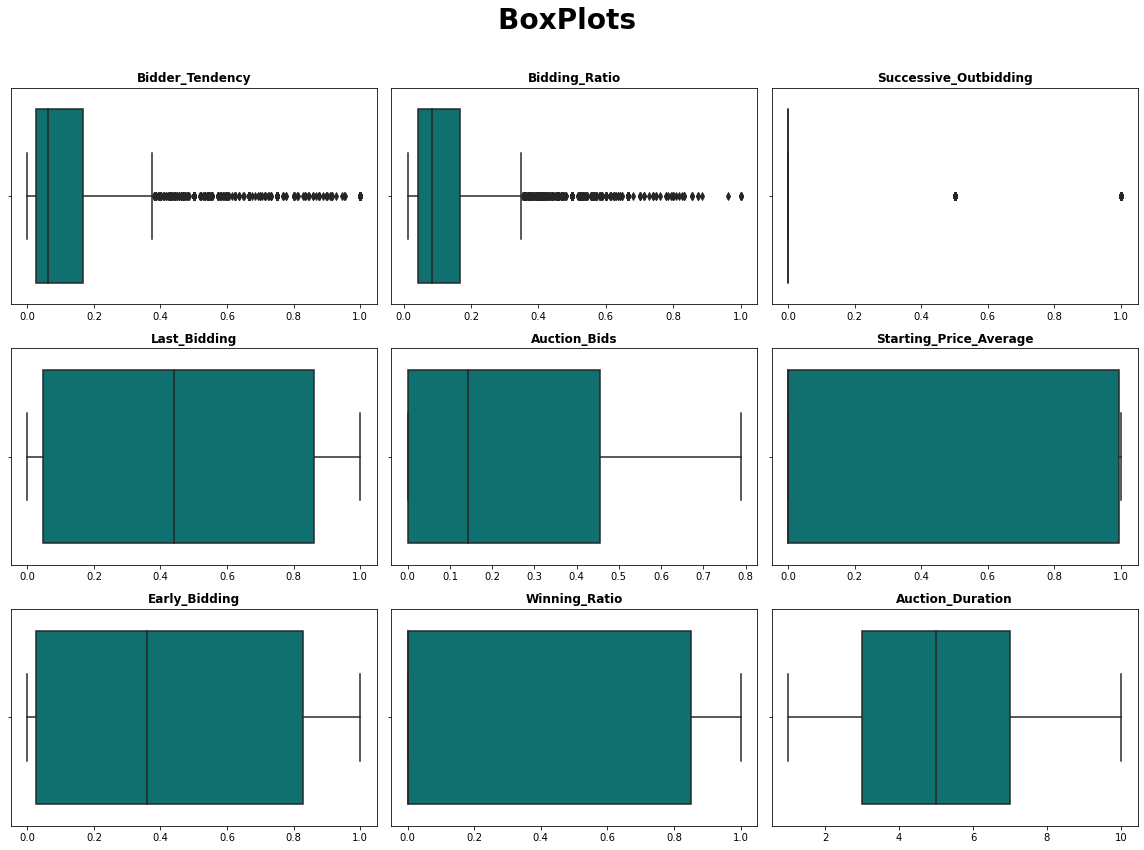

In [14]:
fig, ax = plt.subplots(3,3, figsize=(16,12))                   # Stablishing size of the figure and how many axes
fig.suptitle('BoxPlots \n', fontsize=28, fontweight='bold')    # Plot a general title

# Plotting each column in a ax

boxp(0,0,'Bidder_Tendency',ax)
boxp(0,1,'Bidding_Ratio',ax)
boxp(0,2,'Successive_Outbidding',ax)
boxp(1,0,'Last_Bidding',ax)
boxp(1,1,'Auction_Bids',ax)
boxp(1,2,'Starting_Price_Average',ax)
boxp(2,0,'Early_Bidding',ax)
boxp(2,1,'Winning_Ratio',ax)
boxp(2,2,'Auction_Duration',ax)


As we can observe, 'Bidder_Tendency' and 'Bidding_Ratio' have many outliers and I will decide to remove them using the IQR technique due to the fact that the data in these two variables are very spread.

### 3.3 IQR (Interquartile Range)

IQR tells us the variation and spread of all data points within one quartile of the average. Any value beyond the range of -1.5 x IQR to 1.5 x IQR is considered an outiler. The IQR is calculated by subtracting Q1 from Q3. (Grant, 2022)

I will be using this technique to remove the outiliers. 

In [15]:
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)
IQR= Q3-Q1

IQR

Auction_ID                1278.000000
Bidder_Tendency              0.139640
Bidding_Ratio                0.123188
Successive_Outbidding        0.000000
Last_Bidding                 0.812434
Auction_Bids                 0.454545
Starting_Price_Average       0.993593
Early_Bidding                0.800140
Winning_Ratio                0.851852
Auction_Duration             4.000000
Class                        0.000000
dtype: float64

In [16]:
bid_df = df[~((df['Bidder_Tendency']  < (Q1['Bidder_Tendency']-1.5 * IQR['Bidder_Tendency'])) |
          (df['Bidder_Tendency']  > (Q3['Bidder_Tendency'] + 1.5 * IQR['Bidder_Tendency'])))]

In [17]:
bid_df = df[~((df['Bidding_Ratio']  < (Q1['Bidding_Ratio']-1.5 * IQR['Bidding_Ratio'])) |
          (df['Bidding_Ratio']  > (Q3['Bidding_Ratio'] + 1.5 * IQR['Bidding_Ratio'])))]

Box plot after removing the Outliers

<AxesSubplot:xlabel='Bidding_Ratio'>

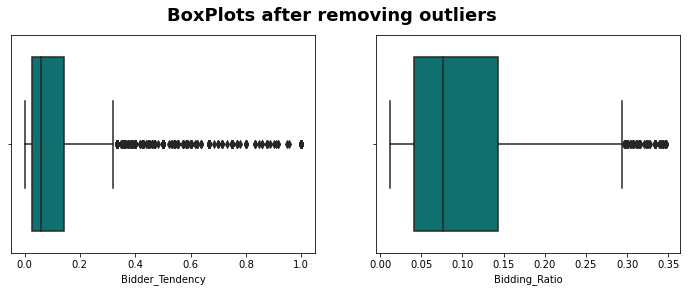

In [18]:
#enphasizing the outliers
fig, axs = plt.subplots(ncols = 2, figsize=(12, 4));
fig.suptitle('BoxPlots after removing outliers \n', fontsize=18, fontweight='bold')
sns.boxplot(bid_df['Bidder_Tendency'], ax = axs[0], color = 'teal')
sns.boxplot(bid_df['Bidding_Ratio'], ax = axs[1], color = 'teal')


We can see that few outliers are remaining after the removal when a new boxplot is generated with the updated data.

In [19]:
bid_df.shape

(5891, 12)

In [20]:
print (bid_df.count())

Auction_ID                5891
Bidder_ID                 5891
Bidder_Tendency           5891
Bidding_Ratio             5891
Successive_Outbidding     5891
Last_Bidding              5891
Auction_Bids              5891
Starting_Price_Average    5891
Early_Bidding             5891
Winning_Ratio             5891
Auction_Duration          5891
Class                     5891
dtype: int64


As seen above there were around 430 outliers’ rows removed.

### 3.4 Distribution of Variables

Now I will plot some histograms to visualize the frequency of occurrance of variables:

In [21]:
def hist(b,c,col,ax):                                            # Creating function to plot histogram
    ax=ax[b][c]                                                  # Ax used to plot graph
    sns.histplot(x=col, data=bid_df, bins=20, kde=True, ax=ax, color= "teal")  # Histogram plot according to column
    ax.set_xlabel('')                                            # Defining x-label
    ax.set_ylabel('')                                            # Defining y-label
    ax.set_title(col, fontweight="bold")                         # Setting title to each plot based on column
    plt.tight_layout()                                           # Organise all the plots

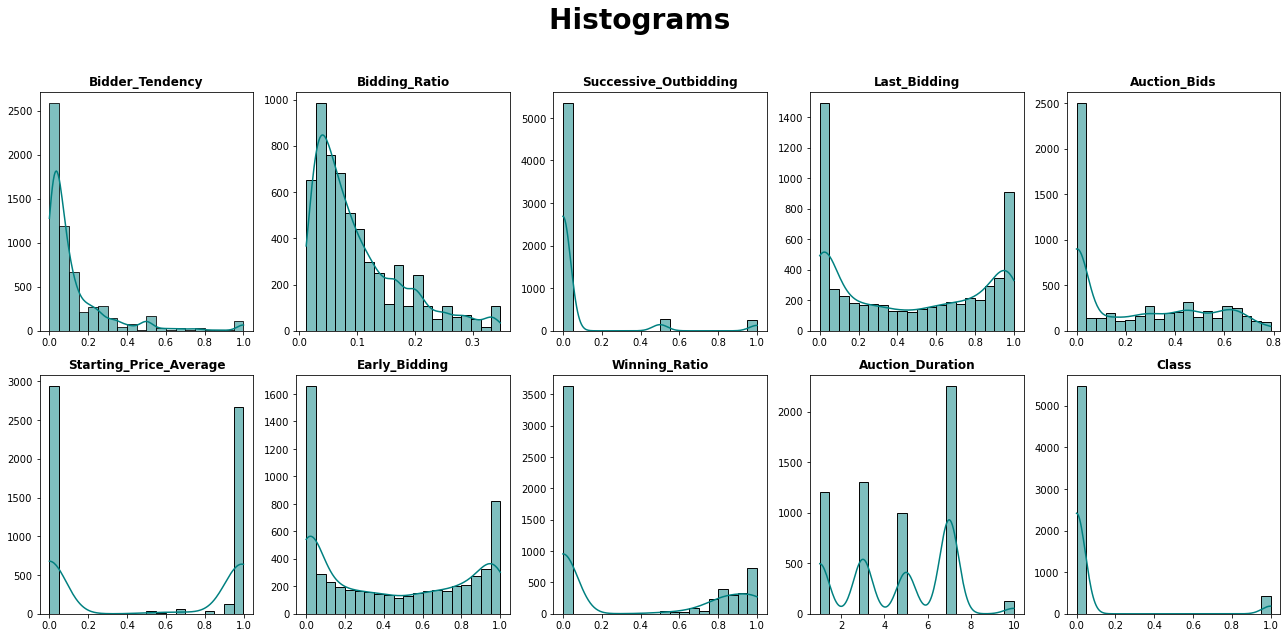

In [22]:
fig, ax = plt.subplots(2,5, figsize=(18,9))      # Stablishing size of the figure and how many axes
fig.suptitle('Histograms \n', fontsize=28, fontweight='bold')    # Plot a general title

# Plotting each column in a ax

hist(0,0,'Bidder_Tendency',ax)
hist(0,1,'Bidding_Ratio',ax)
hist(0,2,'Successive_Outbidding',ax)
hist(0,3,'Last_Bidding',ax)
hist(0,4,'Auction_Bids',ax)
hist(1,0,'Starting_Price_Average',ax)
hist(1,1,'Early_Bidding',ax)
hist(1,2,'Winning_Ratio',ax)
hist(1,3,'Auction_Duration',ax)
hist(1,4,'Class',ax)

As we previously observed the variables Bidder_tendency and Bidding_ratio are right skewed.

By seeing the distributions we can have an idea how skewed are these features, and also to observe that Successive_Outbidding variable it is not oulier since it is represented by only 3 values 0, 0.5 and 1.  

### 3.5 Distribution of Bidder Tendency and Bidding Ratio

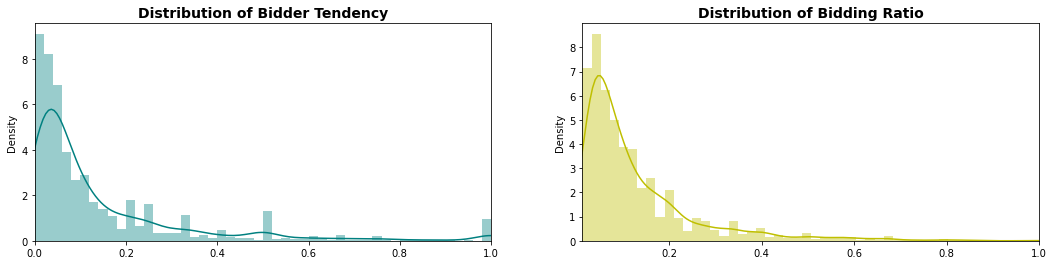

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
colors = ["teal", "lightblue"]
tendency = df['Bidder_Tendency'].values
ratio = df['Bidding_Ratio'].values

sns.distplot(tendency, ax=ax[0], color='teal')
ax[0].set_title('Distribution of Bidder Tendency', fontsize=14,fontweight="bold")
ax[0].set_xlim([min(tendency), max(tendency)])

sns.distplot(ratio, ax=ax[1], color='y')
ax[1].set_title('Distribution of Bidding Ratio', fontsize=14,fontweight="bold")
ax[1].set_xlim([min(ratio), max(ratio)])


plt.show()


### 3.6 Correlation Among Variables

Text(0.5, 1.0, 'Heat Map Correlation of bidding data set')

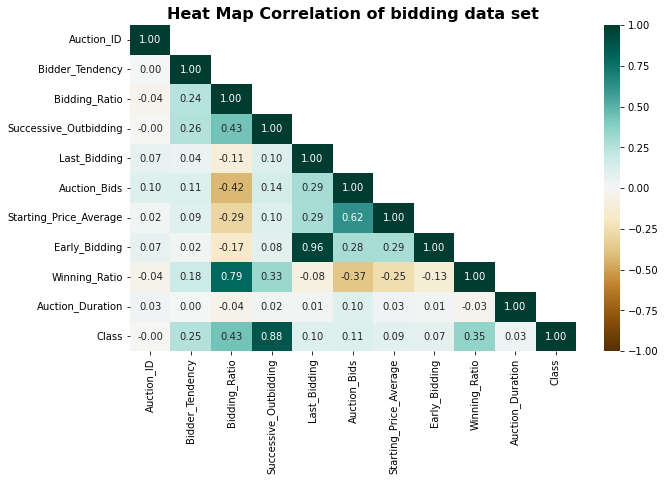

In [24]:
corr = bid_df.corr()
corr_matrix = bid_df.corr()
plt.figure(figsize=(10,6))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
heat_map = sns.heatmap(corr, mask=mask, annot=True, vmax=1, vmin=-1, fmt='.2f',cmap='BrBG')
plt.title("Heat Map Correlation of bidding data set", fontsize = 16,fontweight="bold")

In [25]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

#print highly correlated variables
print("Number of variables with > 0.90 correlation: ", len(to_drop))

Number of variables with > 0.90 correlation:  1


The heatmap above shows that there are a few variables with strong correlation, others with moderate correlation and others with almost no correlation. For instance, the variable Last_bidding has more than 90% of correlation with variable Early_Bidding.

### 3.7 ScatterPlots

As informed previously, the heatmap showed how strong is the correlation among variables. The variables Last_Bidding and Early_Bidding has showed a strong positive correlation (0.96). It is clear, by looking at the scatterplot below, that there is a pattern between the variables.

Text(0.5, 1.0, 'Corr Early_Bidding and Last_Bidding')

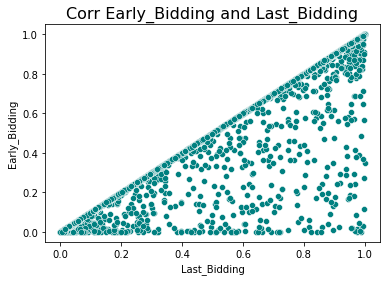

In [26]:
sns.scatterplot(data=bid_df, x="Last_Bidding", y="Early_Bidding", color='teal')
plt.title("Corr Early_Bidding and Last_Bidding", fontsize = 16)

We can also observe that the variables Winning Ratio and Bidding Ratio are positively correlated:

Text(0.5, 1.0, 'Corr Winning_Ratio and Bidding_Ratio')

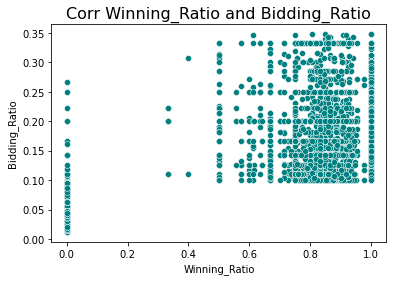

In [27]:
sns.scatterplot(data=bid_df, x="Winning_Ratio", y="Bidding_Ratio", color='teal')
plt.title("Corr Winning_Ratio and Bidding_Ratio", fontsize = 16)

Text(0.5, 1.0, 'Corr Bidding_Ratio and Auction_Bids')

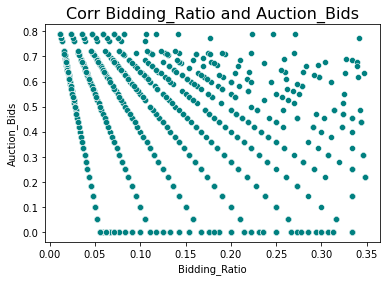

In [28]:
sns.scatterplot(data=bid_df, x="Bidding_Ratio", y="Auction_Bids", color='teal')
plt.title("Corr Bidding_Ratio and Auction_Bids", fontsize = 16)

While the variables Bidding Ratio and Auction bids have a negative correlation, and we can also observe a pattern between these two variables. 

### 3.8 Distribution of Class

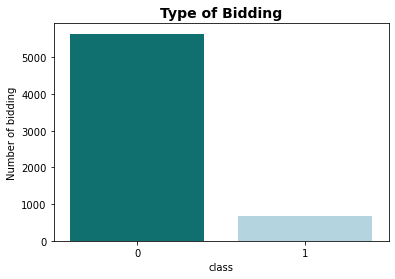

In [29]:
colors = ["teal", "lightblue"]
sns.countplot('Class', data=df, palette=colors)
plt.title("Type of Bidding", fontsize = 14, fontweight="bold")
plt.ylabel('Number of bidding')
plt.xlabel('class');

We can notice how imbalanced is the original dataset. Most of the observations are normal behaviour bidding (89%). It is likely that I will get a lot of errors if I use this dataframe for predictive models and analysis, since the algorithms will "assume" that most bids are normal. **However, I will do experiments and see the model's accuracy both in the balanced and unbalanced dataset in the Modelling part, and observe if it will affect my results or not.**

I will be balancing the dataset in the **6. Class Imbalance** session.

In [30]:
df['Class'].value_counts()

0    5646
1     675
Name: Class, dtype: int64

## 4. Data Preparation

In this part of the project, Preprocessing techniques were used to prepare the dataset for modelling process. It was performed **Min Max scaler** after removing the outliers, even though most of the values are between 0 to 1, except for the variable Auction_duration I decided to scale because some algoriths such as LDA, PCA, Logistic Regression, SVM and k nearest neighbor converge faster when features are relatively smaller or closer to **normal distribution**. (Gogia, 2019)

The variables to be analysed were stored in X and the variable target was stored in y. After that was applied PCA and LDA both in unbalanced and balanced data set using SMOTE technique.


Dropping some ID features as they are irrelevant for the modelling part.

In [31]:
#dropping irrelevant columns
df= bid_df.drop(['Bidder_ID','Auction_ID'], axis=1)

df2 = df.reset_index()
index = df2['Record_ID']

In [32]:
df.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
Record_ID,,,,,,,,,,
2,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
3,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
4,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
5,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0
8,0.038462,0.111111,0.0,0.016844,0.0,0.000000,0.016844,0.800000,7,0


### 4.1 Features Importances

For bidding class prediction is important to know wich features are the most important. To evaluate features on a classification task, this method uses a forest of trees. (scikit-learn, n.d.) 
The bars show the feature importances of the tree. 

In [33]:
y = df['Class']
X = df.drop(['Class'], axis = 1)

In [34]:
fi = DecisionTreeClassifier()
fi.fit(X, y)

DecisionTreeClassifier()

In [35]:
importances = fi.feature_importances_
columns = X.columns
columns

Index(['Bidder_Tendency', 'Bidding_Ratio', 'Successive_Outbidding',
       'Last_Bidding', 'Auction_Bids', 'Starting_Price_Average',
       'Early_Bidding', 'Winning_Ratio', 'Auction_Duration'],
      dtype='object')

Text(0, 0.5, 'Percentage of Importances')

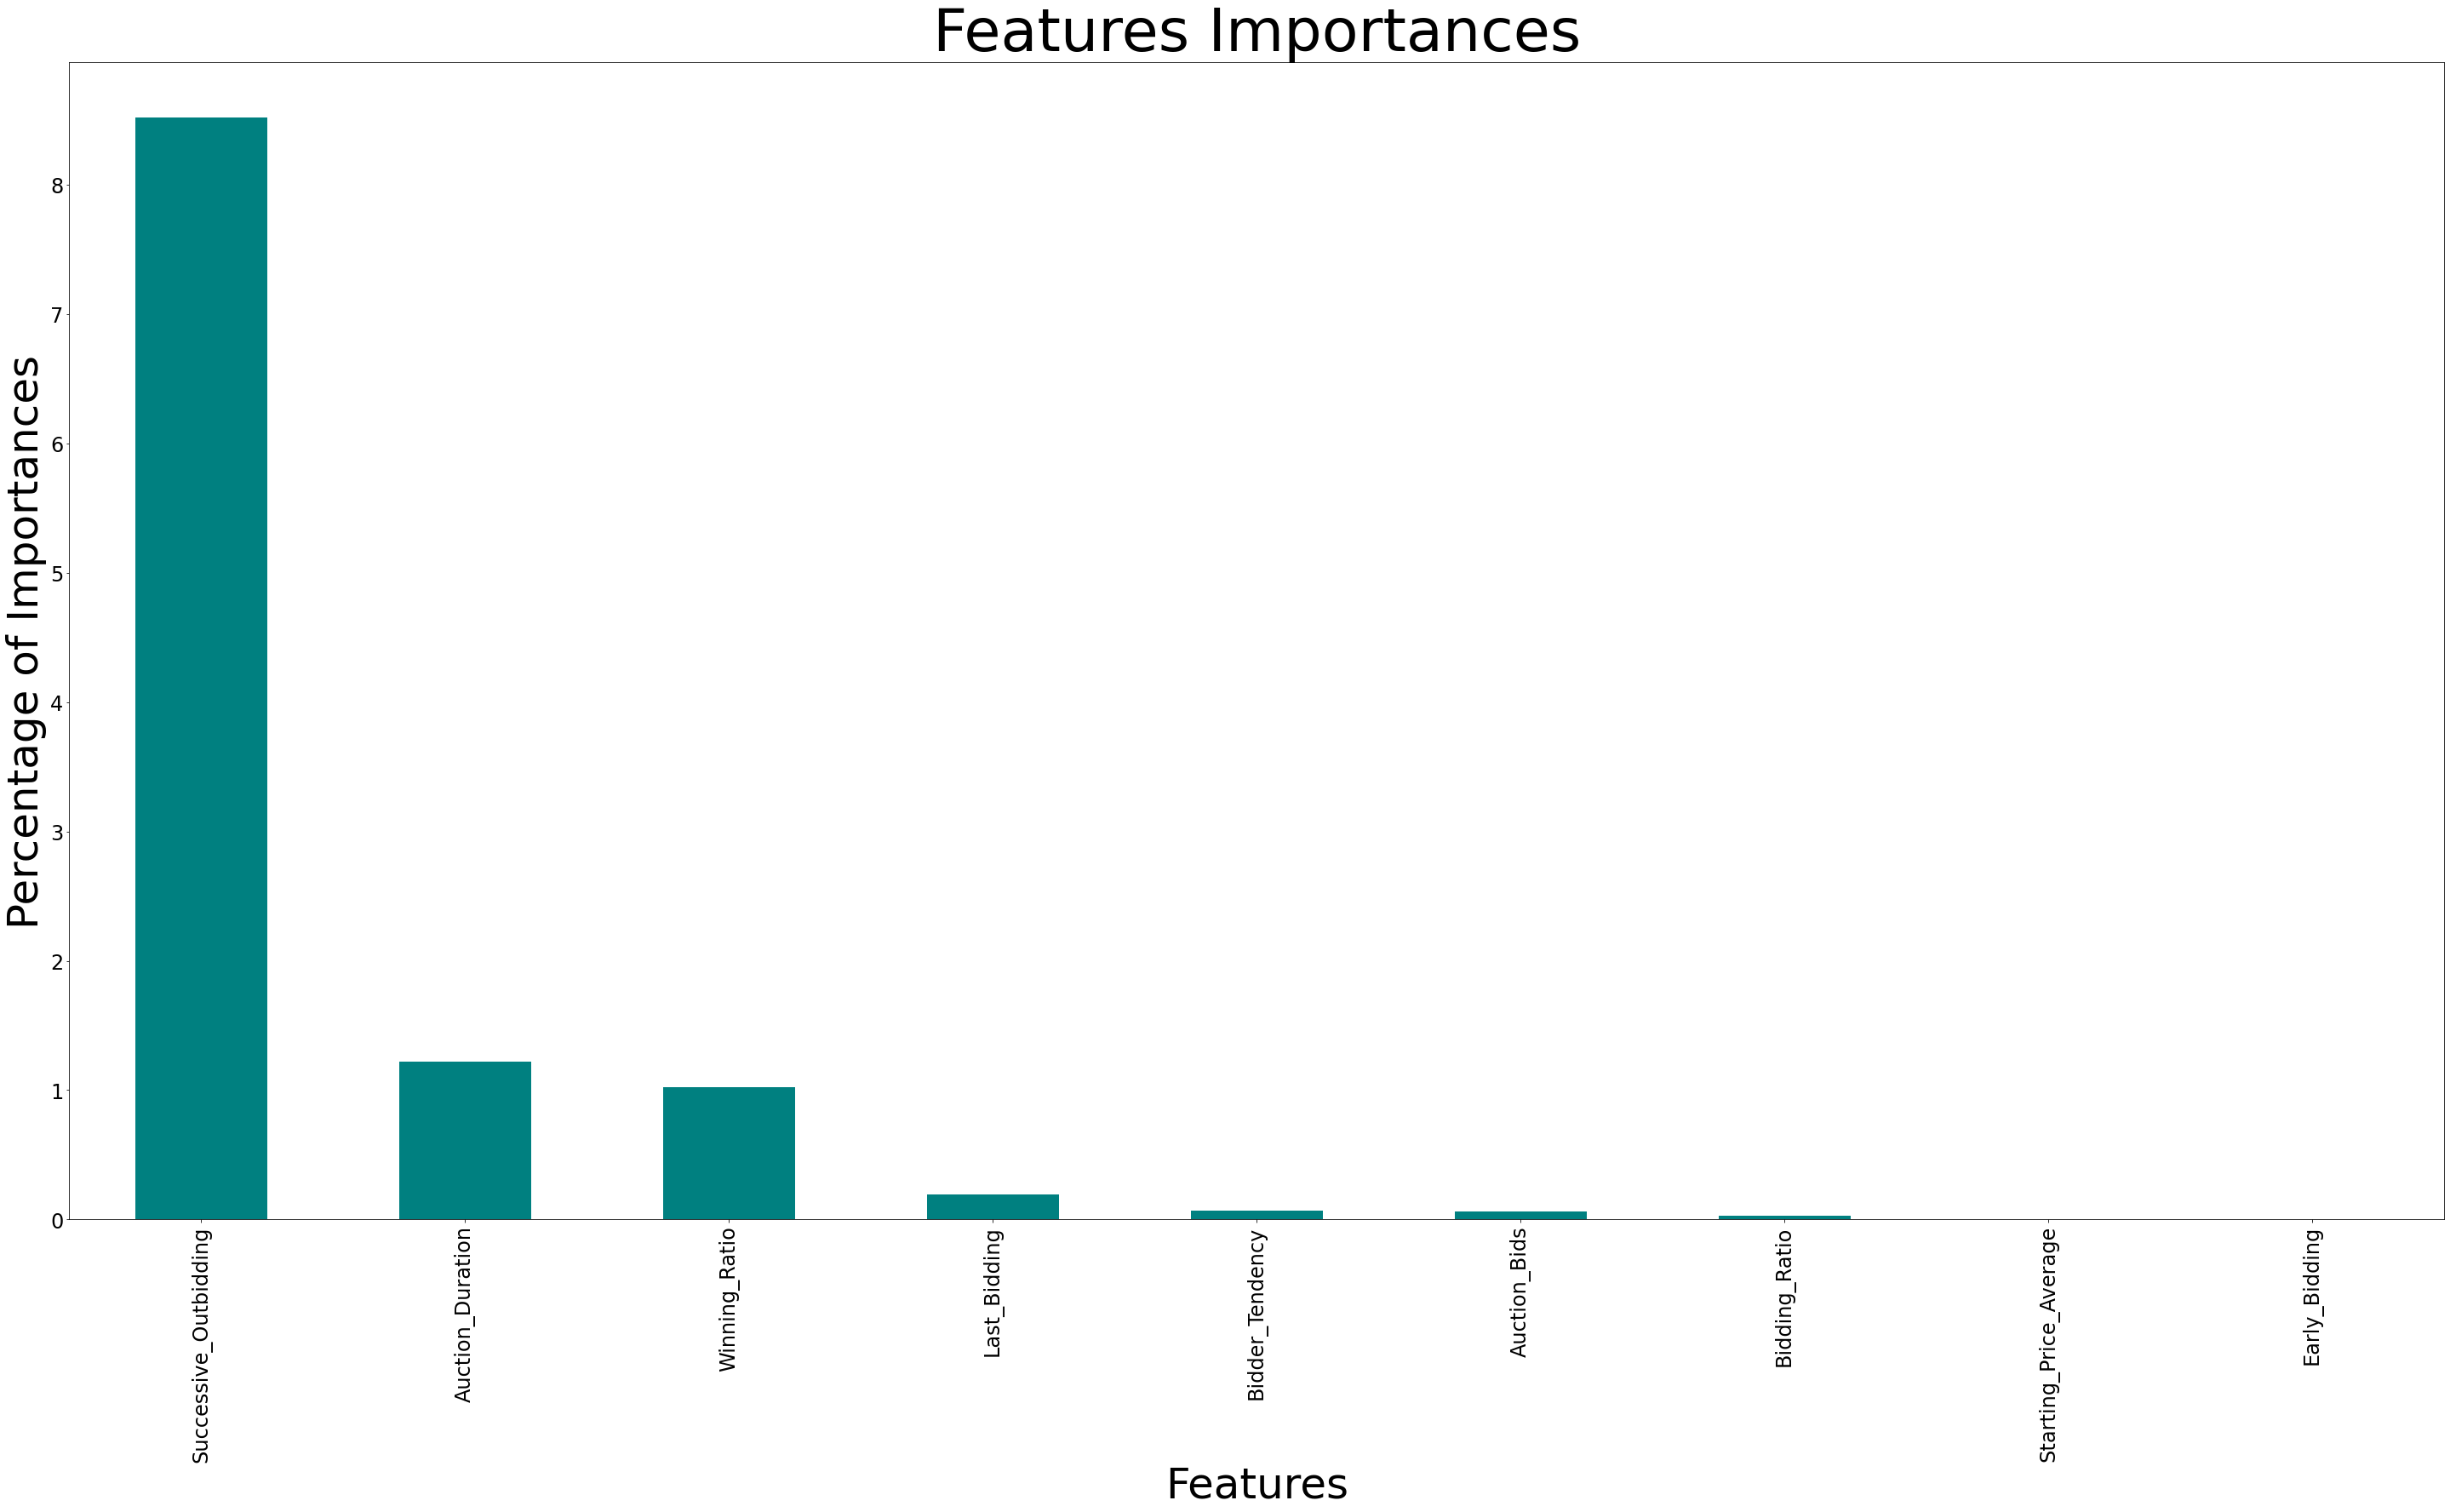

In [36]:
df_import = pd.DataFrame(importances, columns = ['Feature importances'], index=columns)
df_import['Percentage'] = pd.DataFrame((df_import.sort_values(by= ['Feature importances'], ascending=False)/df_import.shape[0])*100)
pd.options.display.float_format = "{:.2f}".format 
df_import=df_import.sort_values(by= ['Percentage'], ascending=False)

# plotting features importances
graph = df_import['Percentage'].plot(kind = 'bar', figsize=(50,25), fontsize=24, color = 'teal')
graph.set_title('Features Importances', fontsize=70)
graph.set_xlabel('Features', fontsize=50)
graph.set_ylabel('Percentage of Importances', fontsize=50)

We see that four the most important features for predicting the target variable are: Successive_Outbidding; Auction_Duration; Winning_Ratio, and Last_Bidding.

And the less important is Starting_Price_Average.

### 4.2 Feature Scaling

Although most of the features seems to be already scaled, I will rescale them in order to obtain a normalized data set using the MinMaxScaler. Thus, the entire data set will range between 0 to 1. "This method subtract the min value and divide by the max minus the min." (Aurélien Géron, 2017, p.93)

In [37]:
scaled = MinMaxScaler().fit_transform(X)

In [38]:
X_norm = pd.DataFrame(scaled, index=X.index, columns=X.columns)
X_norm.columns = X.columns
df_norm = X_norm.join(y, how = 'right')
df_norm.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
Record_ID,,,,,,,,,,
2,0.02,0.56,0.00,0.01,0.00,0.99,0.01,0.94,0.44,0
3,0.14,0.56,0.00,0.00,0.00,0.99,0.00,1.00,0.44,0
4,0.10,0.56,0.00,0.10,0.00,0.99,0.10,1.00,0.44,0
5,0.05,0.63,0.00,0.00,0.00,0.00,0.00,0.50,0.67,0
8,0.04,0.30,0.00,0.02,0.00,0.00,0.02,0.80,0.67,0


Now I have all the values ranging from 0 to 1 and my data set is ready for the next step. 

### 4.3 Spliting in train and test

The model is not created from the entire data set. Some data are randomly selected and some kept aside for checking the accuracy of the model. The testing data represents the data being tested, and the training data represents the data on which the model will be built.

In [39]:
y_norm = df_norm['Class']
X_norm = df_norm.drop(['Class'], axis = 1)

In [40]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size=0.25, random_state=42)

## 5. PCA vs LDA

**Principal Component Analysis (PCA)** is a dimentionally reduction technique that reduce the number of features (principal componentes), the dimentionality of a dataset and **maximize the variance**. These features are projected in a lower dimensional space. (Pratap Dangeti, 2017, pp.320)

**Linear Discriminant Analysis (LDA)** is a technique to reduce dimentionality findind the direction that **maximizes difference between two classes**. (Pratap Dangeti, 2017, pp.283)

Although we apply both PCA and LDA in order to reduce the number of features and the dimensionality of a dataset, LDA is actually a **classification algorithm** based on strength of relationship between independent and dependent variable and is a very good technique to apply before running classification models.

### 5.1 PCA

Since we have an unbalanced data set I will perform PCA both in the original data set and after balancing, using SMOTE technique.

Text(0.5, 1.0, 'PCA_Explained Variance')

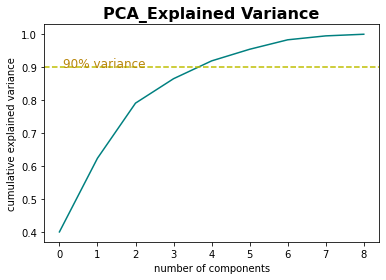

In [41]:
pca = PCA().fit(scaled) 
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='teal') 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance');
plt.axhline(y= 0.90, color='y', linestyle='--')
plt.text(0.10, 0.900, '90% variance', color = 'darkgoldenrod', fontsize=12)
plt.title("PCA_Explained Variance", fontsize = 16, fontweight="bold")

In [42]:
pca = PCA(0.90).fit(scaled)
pca.n_components_

5

From above graph, around 5 features are required to explain the 90% variance of the data

In [43]:
pca = PCA(5)
projected = pca.fit_transform(scaled)
print(pca.explained_variance_ratio_)

[0.4014 0.2231 0.1669 0.074  0.0539]


Using the explained_variance_ratio_ variable we can find out how much variance is distributed along the axis of each principal component.(Aurélien Géron, 2017, p.273)

So as we can see the first principal component contains 40.14% of the variance and the second principal component contains 22.31% of the variance, the third component contains 16.69% of the variance, the fourth component contains 7.48% of the variance and the fifth component contains 5.39% of the variance. Together, the five components contain 90% of the information. 

In [44]:
projected.shape

(5891, 5)

In [45]:
df_pca_x = pd.DataFrame(projected, columns =['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=index)
df_pca = df_pca_x.join(y, how='right')

df_pca.head()

,PC1,PC2,PC3,PC4,PC5,Class
Record_ID,,,,,,
2,-0.44,-0.07,0.87,-0.09,-0.49,0
3,-0.47,-0.04,0.92,-0.08,-0.46,0
4,-0.39,0.05,0.86,-0.09,-0.48,0
5,-0.90,-0.15,0.03,0.26,-0.10,0
8,-0.93,-0.04,0.10,0.27,-0.15,0


plotting the first two principal components:

Text(0.5, 1.0, 'PCA')

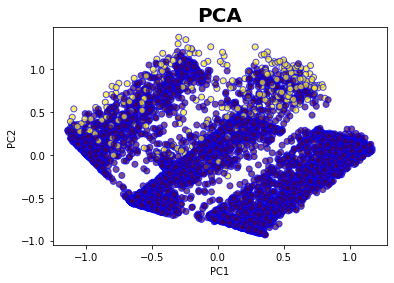

In [46]:
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(
    df_pca.values[:,0],
    df_pca.values[:,1],
    c=y,
    cmap='viridis',
    alpha=0.7,
    edgecolors='b'
)
plt.title("PCA", fontsize = 20, fontweight="bold")

I considered the first two columns that contain the most information, and plot it in two dimensional. As we can observe the classes are not well separeted using PCA. We will see futher ahead the comparasion using LDA.

### 5.2 LDA

In [47]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_norm,y_norm)

In [48]:
lda.explained_variance_ratio_

array([1.])

In [49]:
dt = DecisionTreeClassifier()
dt.fit(X_train_norm, y_train_norm)
y_pred = dt.predict(X_test_norm)
print("LDA Data")
confusion_matrix(y_test_norm, y_pred)

LDA Data


array([[1372,    1],
       [   3,   97]])

In [50]:
df_lda = pd.DataFrame(data = X_lda, columns = ['LDA1'], index=index)
df_lda = df_lda.join(y_norm, how='right')
df_lda.head()

,LDA1,Class
Record_ID,,
2,0.39,0
3,0.35,0
4,0.35,0
5,0.52,0
8,0.54,0


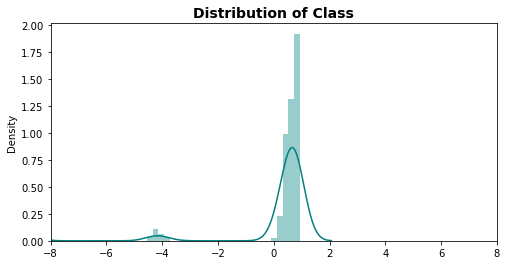

In [51]:
fig, ax = plt.subplots( figsize=(8,4))
colors = ["teal"]

LDA= df_lda['LDA1'].values
Class = df_lda['Class'].values

sns.distplot(LDA, color='teal')
ax.set_title('Distribution of Class', fontsize=14,fontweight="bold")
ax.set_xlim([-8, 8])

plt.show()


From the graph above we see, that negative numbers in LDA 1 belong to '0 class' and positive numbers belong to '1 class'.

Text(0.5, 1.0, 'LDA')

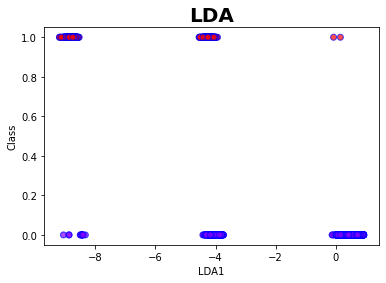

In [52]:
plt.xlabel('LDA1')
plt.ylabel('Class')
plt.scatter(
    df_lda['LDA1'],
    df_lda['Class'],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
plt.title("LDA", fontsize = 20, fontweight="bold")

As we can observe above, the classes can be well-separated in this two-dimensional space. Comparing the PCA graph with LDA graph we can conclud that using LDA for this data set we can have a better result regards to classification problem.

Now, I will split the data into train and test set:

In [53]:
y = df_lda['Class']
X = df_lda.drop(['Class'], axis = 1)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## 6. Class Imbalance

When the classes are not represented equally, this characterizes an unbalanced dataset. It is a problem for classification problems because the classification models are likely to predict everything as the majority class. Learning from highly imbalanced datasets was often considered a problem in the past. (Brownlee, 2020)

To balance the data set **I decided to apply oversampling technique instead of undersampling** as the undersampling process involves eliminating some observations of the majority class. This can be a good choice when we have a very bid data (around millions of rows) which is not the case, as this data set is not that big. **So I decided not to apply undersampling to balance the data set since it could remove valuable information that could lead to underfitting**. (Boyle, 2019)

### 6.1 SMOTE technique

**SMOTE** is a technique for unbalanced dataset that oversample the minority class. It works by drawing lines between close examples in feature space and picking a random point on the line as the new instance. I will import the librarie and then I will apply it only in the train set and use the test set to evaluate it.
When we use any sampling technique **we should divide our data first and apply synthetic sampling only on the training data** if not doing that we could apply the synthetic data on the test set and our model will simply memorize and cause **overfitting**. (Boyle, 2019)

In [55]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [56]:
print('\033[1m'+'Original dataset shape: '+'\033[0m', y_train_norm.shape[0])
print('\033[1m'+'Resampled dataset shape: '+'\033[0m', y_train_smote.shape[0])

Original dataset shape:  4418
Resampled dataset shape:  8202


## 7. Model Building

There are two main types of machine learning models: **Supervised, and Unsupervised**. In **supervised learning there are labels, which means, a labeled data set is used** and we know what the output values for our samples should be. The feature Class in our data set is a label indicating if a bidding is fake or not. In the data set, normal bids are labeled as '0', while abnormal bids are labeled as '1'. Using a group of other features we  can predict if a new bid is fake or not. Problems of this type are known as **classification problems**. In **unsupervised learning labels are not available** and we make predictions based on patterns in the dataset. (Patel, 2019, pp.25, 30)

As I am aware that the dataset is highly imbalanced, my first step is to check the performance of the imbalanced dataset, then I will implement SMOTE technique for balancing it and then I will check the performance again. Finally, I will compare the performance of each model.

### 7.1 Modelling on the original dataset

#### 7.1.1 Logistic Regression

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/linear-regression-vs-logistic-regression.png" width="600">

**Logistic Regression** is a **Supervised machine learning** used for **classification** tasks. I chose this algorithm mainly because logistic regression is intended for **binary (two-class) classification problems**. (Brownlee, 2016)

To define the best model's parameters in order to get the best possible accuracy, I will be working with the next LogisticRegression parameters:

**"Solvers** - Algorithm to use in the optimization problem:  

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
‘liblinear’ is limited to one-versus-rest schemes.

**Penalty** - Specify the norm of the penalty:

'none': no penalty is added;
'l2': add a L2 penalty term and it is the default choice;
'l1': add a L1 penalty term;

**C_values** - Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization." (Scikit-learn.org, 2014)


Tuning hyper-parameters of an estimator:

In [57]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none','l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

To tune the parameters I will use **GridSearchCV**. GridSearchCV is as search over specified parameter values for an estimator. In order to determine the best combination of parameters, the algorithm runs through all the parameters that are entered into the parameter grid.(Okamura, 2020)

In [58]:
log = LogisticRegression()
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=log, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0,verbose=0)
grid_result = grid_search.fit(X, y)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalt

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalt

In [59]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.985910 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


It was defined that the best accuracy will be reached by using C=1.0, penalty = 'l2' and a solver = 'liblinear'. Now, I will train the model with these parameters:

In [60]:
# Applying the model

log = LogisticRegression(C= 1.0, penalty= 'l2', solver= 'liblinear',dual=False)
log_fit = log.fit(X_train, y_train)
pred_log = log.predict(X_test)

# Evaluation of the model

train_accuracy = log.score(X_train, y_train)*100
test_accuracy = log.score(X_test, y_test)*100

# Calculating Cross Validation
log_cross_validation = cross_val_score(log, X, y, cv=3).mean()*100

print('\033[1m'+"Training set score :"+'\033[0m'+"{:.2f}%".format(train_accuracy))
print('\033[1m'+"Test set score :"+'\033[0m'+"{:.2f}%".format(test_accuracy))
print('\033[1m'+"Cross Validation :"+'\033[0m'+"{:.2f}%".format(log_cross_validation))

# Compare actual values to predicted values
R_square = r2_score(y_test, pred_log) *100  
print('\033[1m'+'Coefficient of Determination: '+'\033[0m'+'{:.2f}%'.format(R_square))

Training set score :98.57%
Test set score :98.78%
Cross Validation :98.63%
Coefficient of Determination: 80.69%


Analysing the training set score (98.57%) and the test set score (98.78%), it is possible to observe that the model is not underfit, as both scores are similar. The training set and test set scores are really close to each other with very good accuracy, meaning that also it does not have overfitting happening. The Cross Validation of the model is 98.78%, which means the model is 98.78% accurate compared with real values. The Coefficient of Determination is 80.69%, which means that 80.69% of Total Sum of Squares is maintained by using this predictive model and 80.69% of the data fit the linear regression model.


The next step is to run the classification report and identify Type I and Type II errors.

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1373
           1       0.88      0.95      0.91       100

    accuracy                           0.99      1473
   macro avg       0.94      0.97      0.95      1473
weighted avg       0.99      0.99      0.99      1473



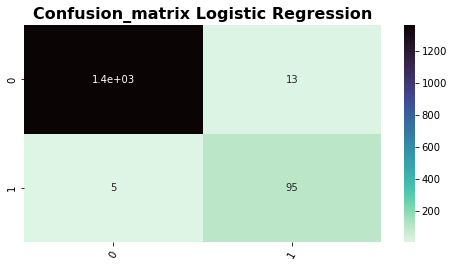

In [61]:
# Creating confusion_matrix to compare real and predicted values
cm = confusion_matrix(y_test_norm, pred_log)

# Plotting heatmap
ticks = log.classes_
plt.figure(figsize=(8,4))
heat_map = sns.heatmap(cm, annot=True, cmap='mako_r', xticklabels=ticks, yticklabels=ticks)
rotx = heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=60)
plt.title("Confusion_matrix Logistic Regression", fontsize = 16,fontweight="bold")

# Displaying classification report
print(classification_report(y_test_norm, pred_log))

The confusion_matrix information result means that there are 1473 observations in the test set. Out of 1373 bids predicted to be Normal, 13 were classified as non normal behavour bidding when they actually were Normal (type one error). Out of 100 bids predicted to be abnormal, 5 were classified as normal (type two error).

#### 7.1.2 Decision Tree Classifier

<img src= "https://miro.medium.com/max/1326/1*xGsYc6aXehD7lyoLEn-mMA.png" width="500">

"The decision tree is one of the most intuitive and popular data mining methods, especially as it provides explicit rules for classification and copes well with heterogeneous data, missing data and non-linear effects." (Stéphane Tufféry, 2011)

**Decision Tree is a Supervised Machine Learning Algorithm** that by splitting the data into subsets, the algorithm builds a tree for each subset and then combines those trees into a single tree. **The idea is to split the dataset into yes/no questions and then isolate data points belonging to each class until we obtain all of the data points**. A node is added to the tree every time we ask a question. After asking a question, the dataset is split into new nodes based on the value of a feature. As a result, only one class can be assigned to the data points in each leaf node. (Aurélien Géron, 2019)

To define the best parameters in order to reach the best accuracy, I will be chechking the next parameters:


**Max_depth** - "The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples."(Scikit-learn.org, 2009)

**Min_samples_leaf** - "The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches."(Scikit-learn.org, 2009)

Tuning hyper-parameters of an estimator

For both hyperparameters defined I will create a range between 1 to 10. In order to determine the best value, the estimator will check each value of both.


In [62]:
depth = range(1, 10)
leaf = range(1, 10)

In [63]:
tree = DecisionTreeClassifier()
grid = dict(max_depth=depth,min_samples_leaf=leaf)
grid_search = GridSearchCV(estimator=tree, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [64]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.986759 using {'max_depth': 4, 'min_samples_leaf': 2}


In [65]:
# Applying the model

tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)
tree_fit = tree.fit(X_train, y_train)
pred_tree = tree.predict(X_test)

# Evaluation of the model

train_accuracy = tree.score(X_train, y_train)*100
test_accuracy = tree.score(X_test, y_test)*100

# Calculating Cross Validation
tree_cross_validation = cross_val_score(tree, X, y, cv=3).mean()*100

print('\033[1m'+"Training set score :"+'\033[0m'+"{:.2f}%".format(train_accuracy))
print('\033[1m'+"Test set score :"+'\033[0m'+"{:.2f}%".format(test_accuracy))
print('\033[1m'+"Cross Validation :"+'\033[0m'+"{:.2f}%".format(tree_cross_validation))

Training set score :98.87%
Test set score :98.71%
Cross Validation :98.59%


The training set score (98.87%) and test set score (98.71%) are really close to each other in this model as well, with good accuracy, meaning that it does not have overfitting happening. The Cross Validation of the model is 98.59%, which means the model is 98.59% accurate compared with real values.

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1373
           1       0.89      0.92      0.91       100

    accuracy                           0.99      1473
   macro avg       0.94      0.96      0.95      1473
weighted avg       0.99      0.99      0.99      1473



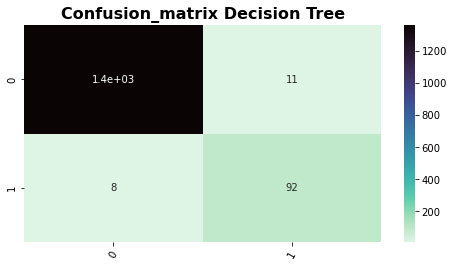

In [66]:
# Creating confusion_matrix to compare real and predicted values
cm = confusion_matrix(y_test, pred_tree)

# Plotting heatmap
ticks = tree.classes_
plt.figure(figsize=(8,4))
heat_map = sns.heatmap(cm, annot=True, cmap='mako_r', xticklabels=ticks, yticklabels=ticks)
rotx = heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=60)
plt.title("Confusion_matrix Decision Tree", fontsize = 16,fontweight="bold")

# Displaying classification report
print(classification_report(y_test, pred_tree))

The confusion_matrix information result means that there are 1473 observations in the test set. Out of 1373 bids predicted to be normal behaviour bidding, 11 were classified as non normal behavour bidding when it actually is Normal (type one error). Out of 100 bids predicted to be non normal, 8 were classified as normal (type two error).

#### 7.1.3 K-nearest Neighbors

<img src= "https://miro.medium.com/max/1200/0*OltO4Txr-D0lPWNL.png" width="600">

K-nearest Neighbors is a Supervised Machine learning algorithm that assumes that similiar things are near to each other by calculating the distance between points on a graph. According to Harrison (2018) there are many ways to calcule these distances. However, the Euclidean distance is the most popular way. 

I chose this algorithm to work with because KNN works very well with lower dimensional data (as we applied LDA) and perform better than other techniques. We will see this at the end, in Compararing Models Session. (Brownlee, 2016a)

To define the best parameters in order to reach the best accuracy, I will be chechking the next parameters:

"**n_neighborsint:** Number of neighbors to use by default for kneighbors queries.

**weights**: Weight function used in prediction. Possible values:

*‘uniform’* : uniform weights. All points in each neighborhood are weighted equally.

*‘distance’* : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

*[callable]* : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

**algorithm**: Algorithm used to compute the nearest neighbors:

*‘ball_tree’* will use BallTree

*‘kd_tree’* will use KDTree

*‘brute’* will use a brute-force search.

*‘auto’* will attempt to decide the most appropriate algorithm based on the values passed to fit method.

**leaf_sizeint**: Leaf size passed to BallTree or KDTree." (scikit-learn developers, 2019)


Tuning hyper-parameters of an estimator:

In [67]:
neighbors = range(1,20)
weights = ['uniform', 'distance', 'callable']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = range (1,50)

In [68]:
knn = KNeighborsClassifier()
grid = dict(n_neighbors=neighbors,weights=weights,algorithm=algorithm,leaf_size=leaf_size)
grid_search = GridSearchCV(estimator=knn, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0,verbose=0)
grid_result = grid_search.fit(X, y)

In [69]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.986250 using {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 11, 'weights': 'uniform'}


In [70]:
# Applying the model

knn = KNeighborsClassifier(algorithm= 'auto', leaf_size= 1, n_neighbors= 11, weights= 'uniform')
knn_fit = knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

# Evaluation of the model

train_accuracy = knn.score(X_train, y_train)*100
test_accuracy = knn.score(X_test, y_test)*100

# Calculating Cross Validation
knn_cross_validation = cross_val_score(knn, X, y, cv=3).mean()*100

print('\033[1m'+"Training set score :"+'\033[0m'+"{:.2f}%".format(train_accuracy))
print('\033[1m'+"Test set score :"+'\033[0m'+"{:.2f}%".format(test_accuracy))
print('\033[1m'+"Cross Validation :"+'\033[0m'+"{:.2f}%".format(knn_cross_validation))

Training set score :98.71%
Test set score :98.64%
Cross Validation :98.46%


The training set score (98.71%) and test set score (98.64%) are really close to each other in this model as well, with good accuracy, meaning that it does not have overfitting or underfitting happening. The Cross Validation of the model is 98.46%, which means the model is 98.46% accurate compared with real values.

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1373
           1       0.89      0.91      0.90       100

    accuracy                           0.99      1473
   macro avg       0.94      0.95      0.95      1473
weighted avg       0.99      0.99      0.99      1473



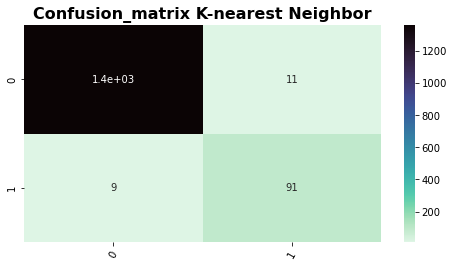

In [71]:
# Creating confusion_matrix to compare real and predicted values
cm = confusion_matrix(y_test, pred_knn)

# Plotting heatmap
ticks = knn.classes_
plt.figure(figsize=(8,4))
heat_map = sns.heatmap(cm, annot=True, cmap='mako_r', xticklabels=ticks, yticklabels=ticks)
rotx = heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=60)
plt.title("Confusion_matrix K-nearest Neighbor", fontsize = 16,fontweight="bold")

# Displaying classification report
print(classification_report(y_test, pred_knn))

The confusion_matrix information result means that there are 1473 observations in the test set. Out of 1373 bids predicted to be normal behaviour bidding, 11 were classified as non normal behavour bidding when it actually is Normal (type one error). Out of 100 bids predicted to be non normal, 9 were classified as normal (type two error).

### 7.2 Modelling after SMOTE

For comparison purposes, I will apply the same machine learning models in the balanced data set. All the comments about choosing models were made in the section above. 

#### 7.2.1 Logistic Regression

In [72]:
# Applying the model

log_over = LogisticRegression(C= 1.0, penalty= 'l2', solver= 'liblinear')
log_fit_over = log_over.fit(X_train_smote, y_train_smote)
pred_log_over = log_over.predict(X_test)

# Evaluation of the model

train_accuracy = log_over.score(X_train_smote, y_train_smote)*100
test_accuracy = log_over.score(X_test, y_test)*100

# Calculating Cross Validation
log_cross_validation = cross_val_score(log_over, X, y, cv=3).mean()*100

print('\033[1m'+"Training set score :"+'\033[0m'+"{:.2f}%".format(train_accuracy))
print('\033[1m'+"Test set score :"+'\033[0m'+"{:.2f}%".format(test_accuracy))
print('\033[1m'+"Cross Validation :"+'\033[0m'+"{:.2f}%".format(log_cross_validation))

# Compare actual values to predicted values
R_square = r2_score(y_test, pred_log_over) *100  
print('\033[1m'+'Coefficient of Determination: '+'\033[0m'+'{:.2f}%'.format(R_square))

Training set score :98.70%
Test set score :97.90%
Cross Validation :98.63%
Coefficient of Determination: 66.74%


Analysing the training set score (98.70%) and the test set score (97.90%), it is possible to observe that the model is slightly overfitting, as training set score is a lit bit higher than test set score. The Cross Validation of the model is 98.63%, which means the model is 98.63% accurate compared with real values. The Coefficient of Determination in this case is 66.74%, which means that 66.74% of Total Sum of Squares is maintained by using this predictive model and 66.74% of the data fit the linear regression model.

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1373
           1       0.77      0.99      0.86       100

    accuracy                           0.98      1473
   macro avg       0.88      0.98      0.93      1473
weighted avg       0.98      0.98      0.98      1473



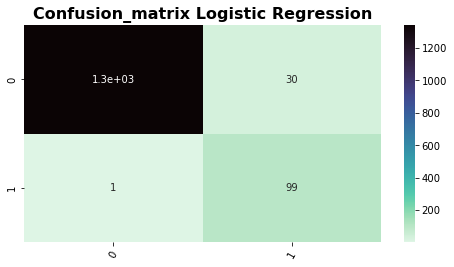

In [73]:
# Creating confusion_matrix to compare real and predicted values
cm = confusion_matrix(y_test, pred_log_over)

# Plotting heatmap
log_over.classes_ = np.array([0, 1])
ticks = log_over.classes_
plt.figure(figsize=(8,4))
heat_map = sns.heatmap(cm, annot=True, cmap='mako_r', xticklabels=ticks, yticklabels=ticks)
rotx = heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=60)
plt.title("Confusion_matrix Logistic Regression", fontsize = 16,fontweight="bold")

# Displaying classification report
print(classification_report(y_test, pred_log_over))

The confusion_matrix information result means that there are 1473 observations in the test set. Out of 1373 bids predicted to be normal behaviour bidding, 30 were classified as non normal behavour bidding when it actually is Normal (type one error). Out of 100 bids predicted to be non normal, 1 were classified as normal (type two error).


#### 7.2.2 Decision Tree Classifier

In [74]:
# Applying the model

tree_over = DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)
tree_fit_over = tree_over.fit(X_train_smote, y_train_smote)
pred_tree_over = tree_over.predict(X_test)

# Evaluation of the model

train_accuracy = tree_over.score(X_train_smote, y_train_smote)*100
test_accuracy = tree_over.score(X_test, y_test)*100

# Calculating Cross Validation
tree_cross_validation = cross_val_score(tree_over, X, y, cv=3).mean()*100

print('\033[1m'+"Training set score :"+'\033[0m'+"{:.2f}%".format(train_accuracy))
print('\033[1m'+"Test set score :"+'\033[0m'+"{:.2f}%".format(test_accuracy))
print('\033[1m'+"Cross Validation :"+'\033[0m'+"{:.2f}%".format(tree_cross_validation))

Training set score :99.22%
Test set score :98.91%
Cross Validation :98.59%


The training set score (99.22%) and test set score (98.91%) in this model performing in the balanced dataset are very close scores comparing to the original dataset, with good accuracy as well. The Cross Validation of the model is 98.59%, which means the model is 98.59% accurate compared with real values.

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1373
           1       0.88      0.98      0.92       100

    accuracy                           0.99      1473
   macro avg       0.94      0.98      0.96      1473
weighted avg       0.99      0.99      0.99      1473



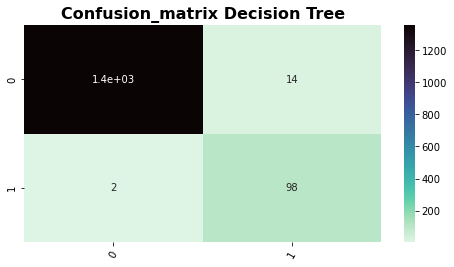

In [75]:
# Creating confusion_matrix to compare real and predicted values
cm = confusion_matrix(y_test, pred_tree_over)

# Plotting heatmap
ticks = tree_over.classes_
plt.figure(figsize=(8,4))
heat_map = sns.heatmap(cm, annot=True, cmap='mako_r', xticklabels=ticks, yticklabels=ticks)
rotx = heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=60)
plt.title("Confusion_matrix Decision Tree", fontsize = 16,fontweight="bold")


# Displaying classification report
print(classification_report(y_test, pred_tree_over))

The confusion_matrix information result means that there are 1473 observations in the test set. Out of 1373 bids predicted to be normal behaviour bidding, 14 were classified as non normal behavour bidding when it actually is Normal (type one error). Out of 100 bids predicted to be non normal, 2 were classified as normal (type two error).

#### 7.2.3 K-nearest Neighbors

In [76]:
# Applying the model

knn_over = KNeighborsClassifier(algorithm= 'auto', leaf_size= 1, n_neighbors= 11, weights= 'uniform')
knn_fit_over = knn_over.fit(X_train_smote, y_train_smote)
pred_knn_over = knn.predict(X_test)

# Evaluation of the model

train_accuracy = knn_over.score(X_train_smote, y_train_smote)*100
test_accuracy = knn_over.score(X_test, y_test)*100

# Calculating Cross Validation
knn_cross_validation = cross_val_score(knn_over, X, y, cv=3).mean()*100

print('\033[1m'+"Training set score :"+'\033[0m'+"{:.2f}%".format(train_accuracy))
print('\033[1m'+"Test set score :"+'\033[0m'+"{:.2f}%".format(test_accuracy))
print('\033[1m'+"Cross Validation :"+'\033[0m'+"{:.2f}%".format(knn_cross_validation))

Training set score :99.20%
Test set score :98.98%
Cross Validation :98.46%


The training set score (99.20%) and test set score (98.98%) are really close to each other in this model as well, with good accuracy, meaning that it does not have overfitting or underfitting happening. The Cross Validation of the model is 98.46%, which means the model is 98.46% accurate compared with real values.

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1373
           1       0.89      0.91      0.90       100

    accuracy                           0.99      1473
   macro avg       0.94      0.95      0.95      1473
weighted avg       0.99      0.99      0.99      1473



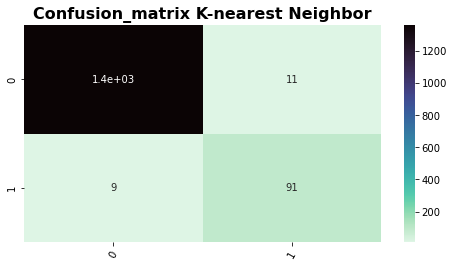

In [77]:
# Creating confusion_matrix to compare real and predicted values
cm = confusion_matrix(y_test, pred_knn_over)

# Plotting heatmap
ticks = knn_over.classes_
plt.figure(figsize=(8,4))
heat_map = sns.heatmap(cm, annot=True, cmap='mako_r', xticklabels=ticks, yticklabels=ticks)
rotx = heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=60)
plt.title("Confusion_matrix K-nearest Neighbor", fontsize = 16,fontweight="bold")

# Displaying classification report
print(classification_report(y_test, pred_knn_over))

The confusion_matrix information result means that there are 1473 observations in the test set. Out of 1373 bids predicted to be normal behaviour bidding, 11 were classified as non normal behavour bidding when it actually is Normal (type one error). Out of 100 bids predicted to be non normal, 9 were classified as normal (type two error).

## 8. Comparing Models

In [78]:
# Calculating test and train accuracy for both

log_train_accuracy = log_fit.score(X_train, y_train)*100
log_test_accuracy = log_fit.score(X_test, y_test)*100
log_over_train_accuracy = log_fit_over.score(X_train_smote, y_train_smote)*100
log_over_test_accuracy = log_fit_over.score(X_test, y_test)*100

tree_train_accuracy = tree_fit.score(X_train, y_train)*100
tree_test_accuracy = tree_fit.score(X_test, y_test)*100
tree_over_train_accuracy = tree_fit_over.score(X_train_smote, y_train_smote)*100
tree_over_test_accuracy = tree_fit_over.score(X_test, y_test)*100

knn_train_accuracy = knn_fit.score(X_train, y_train)*100
knn_test_accuracy = knn_fit.score(X_test, y_test)*100
knn_over_train_accuracy = knn_fit_over.score(X_train_smote, y_train_smote)*100
knn_over_test_accuracy = knn_fit_over.score(X_test, y_test)*100


# Calculating Cross Validation
log_cross_validation = cross_val_score(log, X, y, cv=3).mean()*100
tree_cross_validation = cross_val_score(tree, X, y, cv=3).mean()*100
knn_cross_validation = cross_val_score(knn, X, y, cv=3).mean()*100

log_over_cross_validation = cross_val_score(log_over, X, y, cv=3).mean()*100
tree_over_cross_validation = cross_val_score(tree_over, X, y, cv=3).mean()*100
knn_over_cross_validation = cross_val_score(knn_over, X, y, cv=3).mean()*100

In [79]:
# Creating a dataframe to compare both models

# Naming the models
models_names = ['Logistic Regression', 'Decision Tree', 'KNN']

# Creating dataframe with the Scores
models = pd.DataFrame({'Model': models_names,
                       'Test Score Original dataset': [log_test_accuracy, tree_test_accuracy, knn_test_accuracy],
                       'Test Score with SMOTE': [log_over_test_accuracy, tree_over_test_accuracy, knn_over_test_accuracy],
                       'Train Score Original dataset': [log_train_accuracy, tree_train_accuracy, knn_train_accuracy],
                       'Train Score with SMOTE': [log_over_train_accuracy, tree_over_train_accuracy, knn_over_train_accuracy],
                       'Cross Validation': [log_cross_validation, tree_cross_validation, knn_cross_validation]})

In [80]:
# Sorting values by best Test Score
models.sort_values(by='Test Score with SMOTE', ascending=False)

,Model,Test Score Original dataset,Test Score with SMOTE,Train Score Original dataset,Train Score with SMOTE,Cross Validation
2,KNN,98.64,98.98,98.71,99.20,98.46
1,Decision Tree,98.71,98.91,98.87,99.22,98.59
0,Logistic Regression,98.78,97.90,98.57,98.70,98.63


### 8.1 Comparing Predictions vs Real Values

In [81]:
prediction = pd.DataFrame({'real_value':y_test,
                    'pred_value':pred_knn_over})
prediction

,real_value,pred_value
Record_ID,,
13787,0,1
14330,1,1
12828,0,0
14693,0,0
10997,0,0
...,...,...
8298,0,0
1607,0,0
4008,0,0


## 9. Conclusion

This project was divided into sections. In the first steps was done **data understanding, EDA**, which involved **data cleaning, data preprocessing and plotting some graphs to visualize some characteristics**. Then, was done **Data preparation, defining the most important features** that can be used in the future for data mining and **feature scaling** using **MinMaxScaler** and splitting the data into train and test sets.

After that, through the application of **two dimensionality reduction techniques**, I was able to **compare the results**. It was possible to observe through visualisations that for this classification problem, **LDA performs better than PCA due to the separation of classes**. Although we apply both PCA and LDA to reduce the number of features and the dimensionality of a dataset, **LDA is a classification algorithm** based on strength of the relationship between an independent and dependent variable and is a very good technique to apply **before running classification models**.

It was possible to observe that the data set was **highly imbalanced with 89% of the observations in Class classified as 'Normal'**. So it was applied **oversampling technique (SMOTE)** to balance the dataset and see how the models would perform after this.

Finally, the last section was to perform the models. As the dataset chosen presented a linear relationship between some variables, has a binary class and also is a lower-dimensional data (as we applied LDA), I chose to perform the **Logistic Regression, Decision Tree Classifier and K-nearest Neighbor models** both in the original data set and in the balanced data set with SMOTE.

**I tuned hyperparameters and compared performance** of all models and we could observe that they performed very well and satisfied the accuracy requirements on both the original data set and on the data set after applying SMOTE, as shown by the accuracy of the sets below:

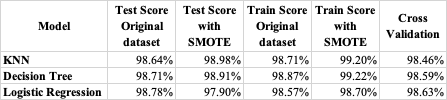


It was possible to observed that after applying SMOTE, the training and test scores increased in all models, except in Logistic Regression which was slightly overfitting since the training set score is higher than the test set score which confirms the overfitting.

It appears that for this specific problem, **KNN and Decision Tree** may be a better choice of model **to predict the bids in the future.**


**Suggestions for Future Research:**

A similar experiment can be conducted by balancing the data set with Random Under Sample for comparison purposes.

## 10. Reference list

1. archive.ics.uci.edu. (n.d.). UCI Machine Learning Repository: Shill Bidding Dataset Data Set. [online] Available at: https://archive.ics.uci.edu/ml/datasets/Shill+Bidding+Dataset [Accessed 29 Apr. 2022].  


2. Aurélien Géron (2017). Hands-on machine learning with Scikit-Learn and TensorFlow : concepts, tools, and techniques to build intelligent systems. Sebastopol, Ca: O’reilly Media, pp.93, 273.  


3. Aurélien Géron (2019). Hands-on machine learning with Scikit-Learn and TensorFlow concepts, tools, and techniques to build intelligent systems. O’Reilly Media, Inc.


4. Boyle, T. (2019). Methods for Dealing with Imbalanced Data. [online] Medium. Available at: https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18 [Accessed 15 May 2022].


5. Brownlee, J. (2016a). K-Nearest Neighbors for Machine Learning. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/k-nearest-neighbors-for-machine-learning/#:~:text=Lower%20Dimensionality%3A%20KNN%20is%20suited [Accessed 15 May 2022].


6. Brownlee, J. (2016b). Logistic Regression for Machine Learning. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/logistic-regression-for-machine-learning/.


7. Brownlee, J. (2016). Logistic Regression for Machine Learning. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/logistic-regression-for-machine-learning/.


8. Brownlee, J. (2020). Imbalanced Classification with the Fraudulent Credit Card Transactions Dataset. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/imbalanced-classification-with-the-fraudulent-credit-card-transactions-dataset/ [Accessed 15 May 2022].


9. Gogia, N. (2019). Why Scaling is Important in Machine Learning? [online] Analytics Vidhya. Available at: https://medium.com/analytics-vidhya/why-scaling-is-important-in-machine-learning-aee5781d161a [Accessed 3 May 2022].


10. Grant, P. (2022). Using Python to Find Outliers With IQR: A How-To Guide. [online] Medium. Available at: https://towardsdatascience.com/using-python-to-find-outliers-with-iqr-a-how-to-guide-1197f2929a12 [Accessed 2 May 2022]. 


11. Harrison, O. (2018). Machine Learning Basics with the K-Nearest Neighbors Algorithm. [online] Medium. Available at: https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761 [Accessed 15 May 2022].


12. pandas.pydata.org. (n.d.). pandas.DataFrame.describe — pandas 1.3.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html [Accessed 29 Apr. 2022].  


13. Patel, A.A. (2019). Hands-On Unsupervised Learning Using Python : how to build applied machine learning solutions from unlabeled data. Sebastopol, Ca O’reilly Media, pp.25, 30.



14. Pratap Dangeti (2017). Statistics for machine learning build supervised, unsupervised, and reinforcement learning models using both Python and R. Birmingham ; Mumbai Packt Publishing July, pp.11, 60, 320, 328.  


15. scikit-learn developers (2019). sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.22.1 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html [Accessed 17 May 2022].


16. scikit-learn. (n.d.). Feature importances with a forest of trees. [online] Available at: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html [Accessed 10 May 2022].  


17. Scikit-learn.org. (2009). sklearn.tree.DecisionTreeClassifier — scikit-learn 0.21.3 documentation. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.


18. Scikit-learn.org. (2014). sklearn.linear_model.LogisticRegression — scikit-learn 0.21.2 documentation. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html [Accessed 13 May 2022].  


19. Sharma, N. (2018). Ways to Detect and Remove the Outliers. [online] Towards Data Science. Available at: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba [Accessed 7 May 2022].  


20. Stéphane Tufféry (2011). Data mining and statistics for decision making. Chichester, West Sussex ; Hoboken, Nj.: Wiley, p.302.  


21. www.w3schools.com. (n.d.). Pandas DataFrame nunique() Method. [online] Available at: https://www.w3schools.com/python/pandas/ref_df_nunique.asp#:~:text=The%20nunique()%20method%20returns [Accessed 28 Apr. 2022].
